# API Project Details

In this section, you need to try to find out answer to the given questions using the solutions you have done in Part 1 or you might need to write code to find the answers.
Find out the answer, justify them using proper plots and numbers and place them all in a pdf file and upload.
Find out answer for each question, put your answer along with the proper explanation and plots in a pdf file. Make a zip file of your pdf file and .ipynb file which is having code, and upload that.
Your report will be evaluated manually and score will be awarded accordingly.

## Zomato Dataset Details

#### Dataset Collection 

Due to Zomato API Basic Plan restriction, we cannot collect enough data for analysis. To overcome this problem ‘Zomato.csv’ file is provided to analyse the data deeply and to get useful inference.
Data has been collected from the Zomato API in the form of .json files(raw data) using the following url and stored in CSV file -

##### LINK : https://drive.google.com/file/d/1FSa_x3COvCoMODa44qXufO9CQb3ydqKw/view?usp=sharing

#### Details of zomato.csv -


Country Codes :
Country Code   Country
1              India

14             Australia

30             Brazil

37             Canada

94             Indonesia

148            New Zealand

162            Phillipines

166            Qatar

184            Singapore

189            South Africa

191            Sri Lanka

208            Turkey

214            UAE

215            United Kingdom

216            United States

### 1. The dataset is highly skewed toward the cities included in Delhi-NCR.¶

So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR.

Doing this would make our analysis turn toward Delhi-NCR vs Rest of India.




### 1.1) Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [40]:
import csv
import pandas as pd

df1 = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
df = df1.copy() #creating a copy of main data frame 'df1'
df.head(50)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


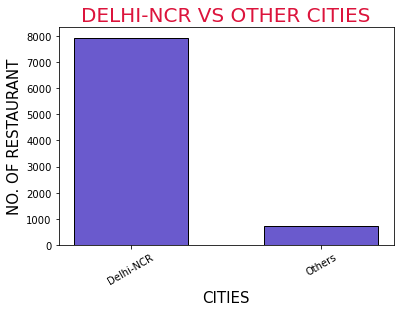

Delhi-NCR Count : 7947
Others-Count : 705


In [2]:
##importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding = 'ISO-8859-1')
lst = ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon','Faridabad']
for i in lst:
    df.loc[df['City'] == i, 'City'] = 'Delhi-NCR'
df = df[df['Currency'] == 'Indian Rupees(Rs.)']
cities = []
for i in df['City']:
    cities.append(i)
    
np_city = np.array(cities)
delhi_count = 0
other_count = 0

for i in np_city:
    if i == 'Delhi-NCR':
        delhi_count += 1
    else:
        other_count += 1
        
x = ['Delhi-NCR', 'Others']
y = [delhi_count, other_count]

##ploting part:

plt.bar(x, y, color = 'slateblue', edgecolor = 'black', width = 0.6)
plt.xticks(rotation = 30)
plt.xlabel('CITIES', fontsize = 15, color = 'black')
plt.ylabel('NO. OF RESTAURANT', fontsize = 15, color = 'black')
plt.title('DELHI-NCR VS OTHER CITIES', fontsize = 20, color = 'crimson')
plt.show()

print('Delhi-NCR Count',":", delhi_count)
print('Others-Count', ":", other_count)

### 1.2) Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India. Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [3]:
d = []
r = []
del_ncr = df[df['City'] == 'Delhi-NCR']
del_ncr_cuisines = del_ncr['Cuisines']

for i in del_ncr_cuisines:
    d1 = i.split(',')
    for i in d1:
        d.append(i)
        
rest = df[df['Country Code'] == 1]
rest_cuisines = rest['Cuisines']

for i in rest_cuisines:
    r1 = i.split(',')
    for i in r1:
        r.append(i)

diff = set(r) - set(d)
for i in list(diff):
    print(i)

Charcoal Grill
 German
Tex-Mex
 Steak
 BBQ
Indian
Andhra
 Cajun
Malwani


### 1.3) Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [4]:
del_ncr = df[df['City'] == 'Delhi-NCR']
del_cus = del_ncr['Cuisines']
others = df[(df['City'] != 'Delhi-NCR') & (df['Country Code'] == 1)]
oth_cus = others['Cuisines']

d = del_cus.value_counts()[:10]  ##Cuisines offered in DELHI-NCR
r = oth_cus.value_counts()[:10] ## Cuisines offered in Others

print('TOP 10 Cuisines Served by Delhi-NCR Restaurants are : ')
print()
print(d)

print()
print('-------------------------------------------------------------------------------------------------------------------------------')
print()


print('TOP 10 Cuisines Served by Rest of The Restaurants are : ')
print()
print(r)

TOP 10 Cuisines Served by Delhi-NCR Restaurants are : 

North Indian                      904
North Indian, Chinese             475
Fast Food                         331
Chinese                           325
North Indian, Mughlai             315
Cafe                              254
Bakery                            213
North Indian, Mughlai, Chinese    194
Bakery, Desserts                  168
Street Food                       145
Name: Cuisines, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------

TOP 10 Cuisines Served by Rest of The Restaurants are : 

North Indian, Chinese                 36
North Indian                          32
Cafe                                  25
North Indian, Mughlai                 19
Fast Food                             17
Chinese                               15
North Indian, Chinese, Continental    12
Cafe, Fast Food                        9
Italian            

### 1.4) Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

DELHI CUISINES AND THEIR COUNTS

In [5]:
delhi_val = []
delhi_count = []

for i in d.index:
    delhi_val.append(i)
print(delhi_val)

print()

for i in d.values:
    delhi_count.append(i)
print(delhi_count)



['North Indian', 'North Indian, Chinese', 'Fast Food', 'Chinese', 'North Indian, Mughlai', 'Cafe', 'Bakery', 'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food']

[904, 475, 331, 325, 315, 254, 213, 194, 168, 145]


GRAPHICAL REPRESENTATION

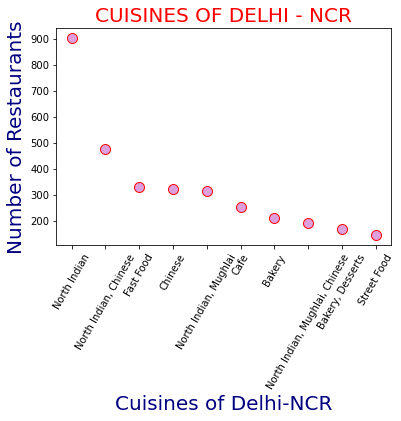

In [6]:
import matplotlib.pyplot as plt

plt.scatter(delhi_val, delhi_count, color = 'plum', edgecolor = 'red', s = 100)
plt.xticks(rotation = 60)
plt.xlabel('Cuisines of Delhi-NCR', fontsize = 20, color = 'navy')
plt.ylabel('Number of Restaurants', fontsize = 20, color = 'navy')
plt.title('CUISINES OF DELHI - NCR', fontsize = 20, color = 'red')
plt.show()


REST OF INDIA CUISINES AND THEIR COUNTS

In [7]:
rest_val = []
rest_count = []

for i in r.index:
    rest_val.append(i)
print(rest_val)

print()

for i in r.values:
    rest_count.append(i)
print(rest_count)

['North Indian, Chinese', 'North Indian', 'Cafe', 'North Indian, Mughlai', 'Fast Food', 'Chinese', 'North Indian, Chinese, Continental', 'Cafe, Fast Food', 'Italian', 'North Indian, Fast Food']

[36, 32, 25, 19, 17, 15, 12, 9, 7, 7]


GRAPHICAL REPRESENTATION

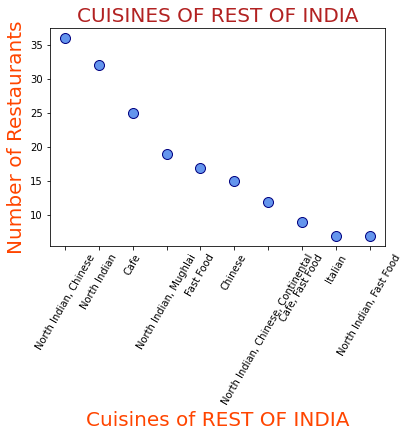

In [8]:
import matplotlib.pyplot as plt

plt.scatter(rest_val, rest_count, color = 'cornflowerblue', edgecolor = 'navy', s = 100)
plt.xticks(rotation = 60)
plt.xlabel('Cuisines of REST OF INDIA', fontsize = 20, color = 'orangered')
plt.ylabel('Number of Restaurants', fontsize = 20, color = 'orangered')
plt.title('CUISINES OF REST OF INDIA', fontsize = 20, color = 'firebrick')
plt.show()

### 2.) User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

#### 2.1 ) Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

##### 2.1.1) Number of Votes given Restaurant

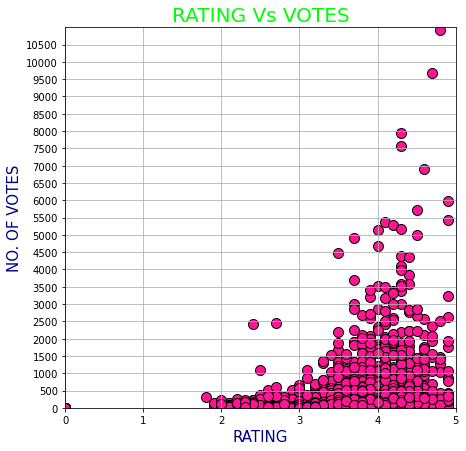

In [9]:
import matplotlib.pyplot as plt
import pandas as pd 

plt.figure(figsize = (7,7))
plt.scatter(df['Aggregate rating'], df['Votes'], s = 100, alpha = 1, color = 'deeppink', edgecolor = 'black')
plt.yticks(np.arange(0, 11000, 500))
plt.axis([0,5,0, 11000])
plt.xlabel('RATING', fontsize = 15, color = 'darkblue')
plt.ylabel('NO. OF VOTES', fontsize = 15, color = 'darkblue')
plt.title('RATING Vs VOTES', fontsize = 20, color = 'lime')
plt.grid()
plt.show()



#### The above graph represents that the Number of Votes is directly propotional to the rating. So it represents that a restuarant having higher number of votes has a rating between 4 and 5.

#####  2.1.2) Restaurant serving more number of cuisines.

In [10]:
df = df[df['Cuisines'].notnull()]
cuisines = [len(i.split(',')) for i in df['Cuisines']]
rating = [i for i in df['Aggregate rating']]

d = {}

for i in cuisines:
    d[i] = d.get(i,0) + 1
    
for k, v in d.items():
    print("Number of Cuisines Served", ":", k, " ", ",", " ", "Number of Restaurants serving given no. of Cuisine", ":", v)
    

Number of Cuisines Served : 2   ,   Number of Restaurants serving given no. of Cuisine : 3144
Number of Cuisines Served : 1   ,   Number of Restaurants serving given no. of Cuisine : 3097
Number of Cuisines Served : 3   ,   Number of Restaurants serving given no. of Cuisine : 1596
Number of Cuisines Served : 4   ,   Number of Restaurants serving given no. of Cuisine : 552
Number of Cuisines Served : 5   ,   Number of Restaurants serving given no. of Cuisine : 155
Number of Cuisines Served : 6   ,   Number of Restaurants serving given no. of Cuisine : 70
Number of Cuisines Served : 7   ,   Number of Restaurants serving given no. of Cuisine : 26
Number of Cuisines Served : 8   ,   Number of Restaurants serving given no. of Cuisine : 12


GRAPHICAL REPRESENTATION

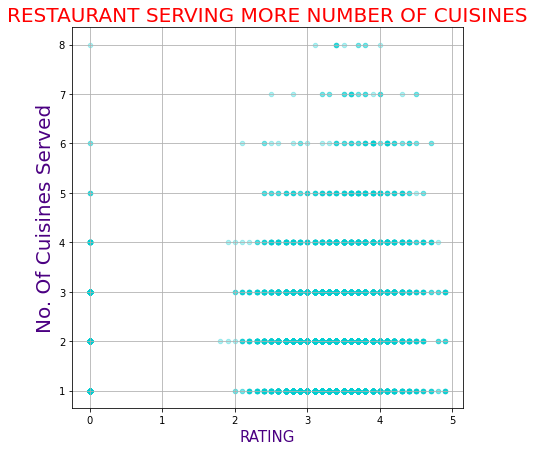

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7,7))
plt.scatter(rating , cuisines, color = 'darkturquoise', s = 20, alpha = 0.3, edgecolor = 'darkturquoise')
plt.xlabel('RATING', fontsize = 15, color = 'indigo')
plt.ylabel('No. Of Cuisines Served', fontsize = 20, color = 'indigo')
plt.title('RESTAURANT SERVING MORE NUMBER OF CUISINES', fontsize = 20, color = 'red')
plt.grid()
plt.show()

##### <b>Clearly from the above graph, we can see that restaurents serving more no. of cuisines are not likely to have high or good ratings whether the restaurents having mainly 1 and types of cuisines are more likely to have higher ratings. As we saw in the graph the restaurents serving more than 6 cuisines are not having good rating</b>

##### 2.1.3) Average Cost of Restaurant

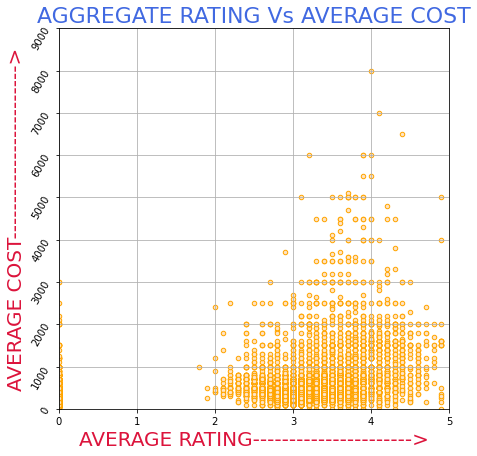

In [12]:
import matplotlib.pyplot as plt

rating = [i for i in df['Aggregate rating']]
avg_cost = [i for i in df['Average Cost for two']]
plt.figure(figsize = (7,7))
plt.scatter(rating,avg_cost, s = 20, color = 'bisque', edgecolor = 'orange')
plt.axis([0,5,0,9000])
plt.xlabel('AVERAGE RATING---------------------->', fontsize = 20, color = 'crimson')
plt.ylabel('AVERAGE COST------------------------>', fontsize = 20, color = 'crimson')
plt.title('AGGREGATE RATING Vs AVERAGE COST', fontsize = 22, color ='royalblue')
plt.yticks(rotation = 60)
plt.grid()

plt.show()



#### As we see clearly in the graph that when the average cost is upto 2000 then mostly rating is between 3 to 5 which is good and with increase in the average cost the rating is mostly between 4 to 5 but when the average cost is between 1500 to 2500 then there is slighty decrease in rating of the restaurents.

##### 2.1.4) Restaurant serving some specific cuisines.

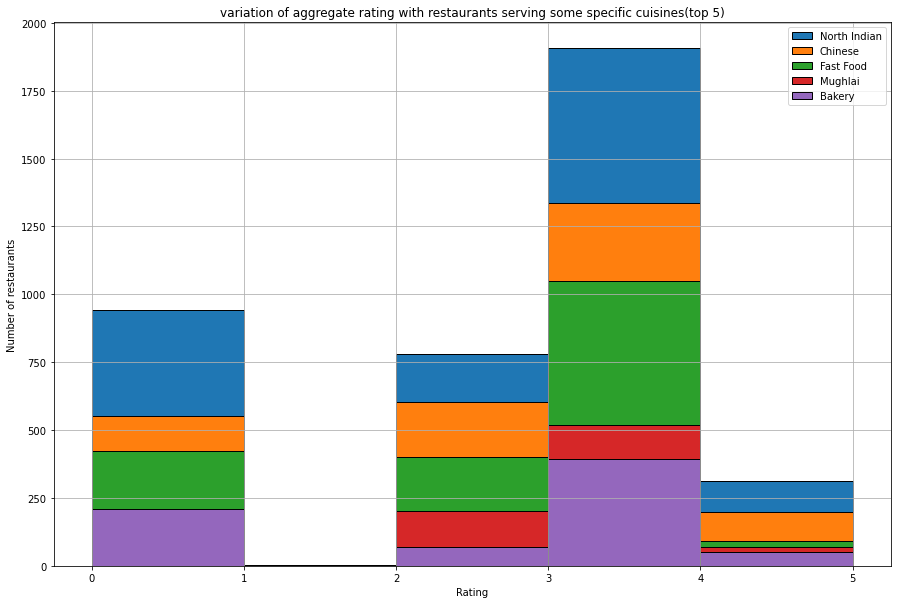

In [13]:
df = df[df['Cuisines'].notnull()]
cuisine = []
pop_cus = []
for i in df['Cuisines']:
    for j in i.split(','):
        cuisine.append(j.strip())
plt.figure(figsize = (15, 10))        
s = pd.DataFrame(list(cuisine), columns = ['specific_cuisine'])
labels = s['specific_cuisine'].value_counts().index[0:5]
for i in labels:
    pop_cus.append(i)

for i in pop_cus:
    rate = []
    for j, k in zip(df['Cuisines'], df['Aggregate rating']):
        if i in j:
            rate.append(k)
    
 

   
    plt.hist(rate, edgecolor='black', bins=[0, 1, 2, 3, 4, 5])
    plt.xlabel('Rating')
    plt.ylabel('Number of restaurants')
    plt.title('variation of aggregate rating with restaurants serving some specific cuisines(top 5)')

plt.grid()
plt.legend(labels=pop_cus)
plt.show()
           

        


 


From the above histrogram plot, it is clear that North indian cuisinie is the best rated among all the cuisinies in all the aggregate ranges. After it comes the chinese cuisinie, it is rated between 3 to 4 maximum number of times. Then we have Fast Food, which has been rated between 3 to 4 stars maximum number of times.after these comes mughlai and italian cuisines.it seems like people like the italian cuisinie very much because it has a considerable rating between 3 to 4 and 4 to 5 also.

#### 2.2) Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?


###### 2.2.1) Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [94]:
import csv
import pandas as pd

df1 = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
df = df1.copy()


##creating numpy arrays for calculations :

np_rating = np.array([i for i in df['Aggregate rating']])
np_votes = np.array([i for i in df['Votes']])
np_locality = np.array([i for i in df['Locality']])

d = {}
for i in set(np_locality):
    if sum(np_votes[np.argwhere(np_locality == i)])[0] != 0:
        d[i] = sum((np_votes * np_rating)[np.argwhere(np_locality == i)])[0] / sum(np_votes[np.argwhere(np_locality == i)])[0]
        
np_l = np.array([i for i in d.keys()])
np_w = np.array([i for i in d.values()])

np_l = np_l[np.argsort(np_w)][::-1]
np_w = np.sort(np_w)[::-1]

for i in range(10):
    print(np_l[i] , " : ", np_w[i])


Old Dutch Hospital, Fort  :  4.9
Cengkareng  :  4.9
Fort Street  :  4.9
Bebek  :  4.9
Penjaringan  :  4.9
The Milk District  :  4.9
Taman Impian Jaya Ancol, Ancol  :  4.9
Marshalltown  :  4.9
Aminabad  :  4.9
Sofitel Philippine Plaza Manila, Pasay City  :  4.9


### 3) Visualization

#### 3.1) Plot the bar graph of top 15 restaurants have maximum number of outlets.

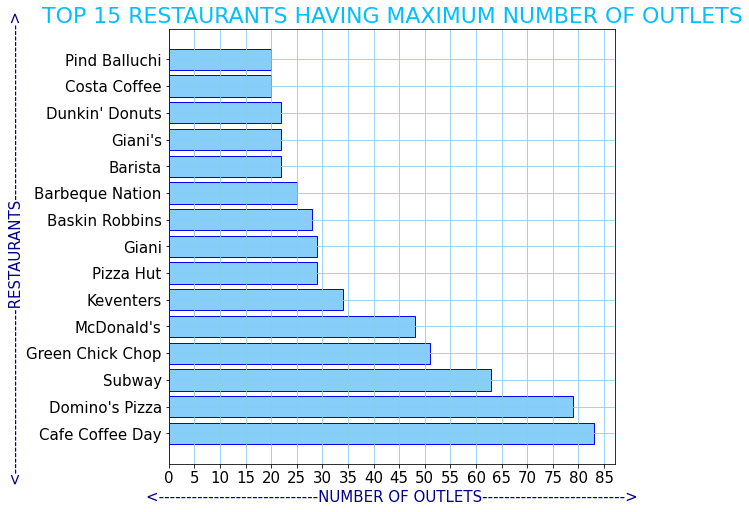

In [14]:
import matplotlib.pyplot as plt

res = df['Restaurant Name'].value_counts()
names = res.index[:15]
freq = res.values[:15]

### ploting the graph :

plt.figure(figsize = (8,8))
plt.barh(names, freq, color = 'lightskyblue', edgecolor = 'blue')
plt.grid
plt.xticks(np.arange(0,90,5), size = 15, color = 'black')
plt.yticks(size = 15, color = 'black')
plt.xlabel('<-----------------------------NUMBER OF OUTLETS-------------------------->', fontsize = 15, color = 'darkblue')
plt.ylabel('<------------------------------RESTAURANTS-------------------------------->', fontsize = 15, color = 'darkblue')
plt.title('TOP 15 RESTAURANTS HAVING MAXIMUM NUMBER OF OUTLETS', fontsize = 22, color = 'deepskyblue')
plt.grid(color = 'skyblue')
plt.show()




#### 3.2) Plot the histogram of aggregate rating of restaurant (drop the unrated restaurant)

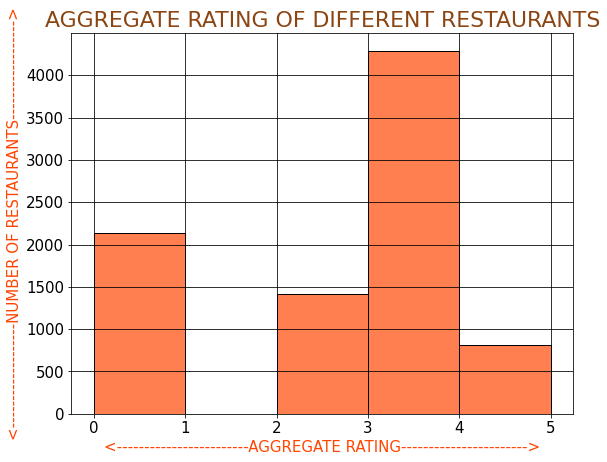

In [15]:
h = df['Aggregate rating'].dropna()
plt.figure(figsize = (9,7))
plt.hist(h, color = 'coral', edgecolor = 'black', bins = range(6))
plt.xticks(range(6), size = 15)
plt.yticks(size = 15)

plt.xlabel('<------------------------AGGREGATE RATING----------------------->', fontsize = 15, color = 'orangered')
plt.ylabel('<-------------------NUMBER OF RESTAURANTS------------------>', fontsize = 15, color = 'orangered')
plt.grid(color = 'black')
plt.title('AGGREGATE RATING OF DIFFERENT RESTAURANTS', fontsize = 22, color = 'saddlebrown')
plt.show()

#### 3.3) Plot the bar graph of top 10 restaurants in the data with the highest number of votes

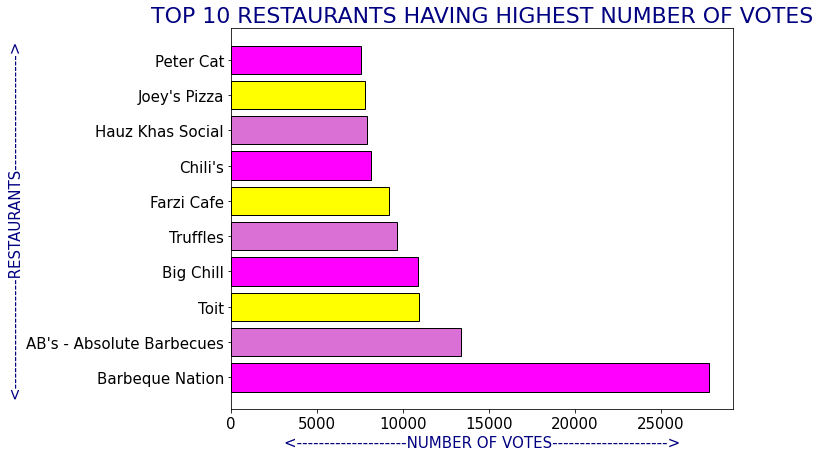

In [18]:
res_votes = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending = False)[0:10]
plt.figure(figsize = (9,7))
plt.barh(res_votes.index, res_votes.values, edgecolor = 'black', color = ['fuchsia','orchid', 'yellow'] )

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('<--------------------NUMBER OF VOTES--------------------->', fontsize = 15, color = 'navy')
plt.ylabel('<--------------------RESTAURANTS--------------------->', fontsize = 15, color = 'navy')
plt.title('TOP 10 RESTAURANTS HAVING HIGHEST NUMBER OF VOTES', fontsize = 22, color = 'navy')
plt.show()

#### 3.4) Plot the pie graph of top 10 cuisines present in restaurants in the USA.

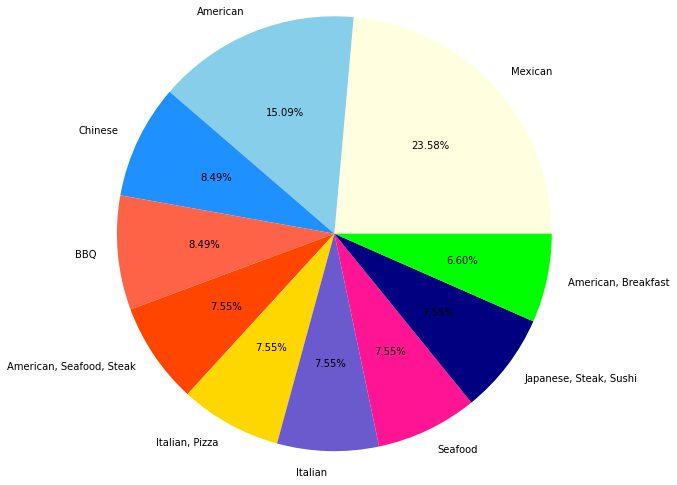

In [95]:
import csv
import pandas as pd

df1 = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
df = df1.copy()

df = df[df['Cuisines'].notnull()]
df = df[df['Country Code'] == 216]

us = df['Cuisines'].value_counts()

cus_names = us.index[:10]
freq = us.values[:10]

#ploting pie graph;

plt.pie(freq, labels = cus_names, autopct = '%.2f%%', radius = 2.5 , colors = ['lightyellow', 'skyblue','dodgerblue','tomato', 'orangered', 'gold','slateblue', 'deeppink', 'navy', 'lime'])
plt.show()







#### 5.Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

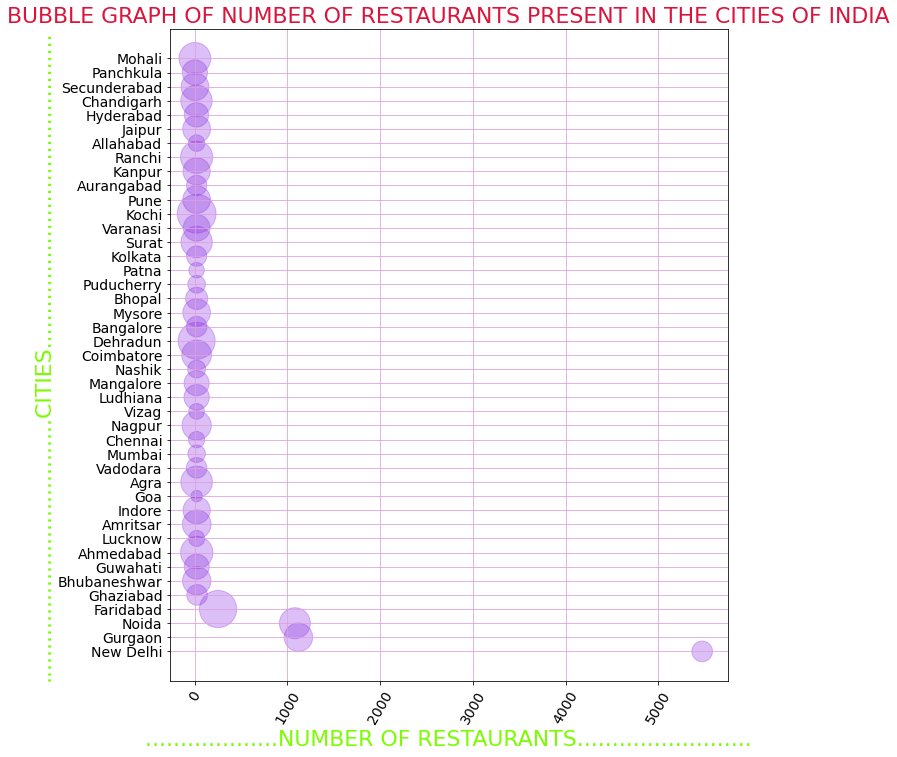

In [97]:
import csv
import pandas as pd

df1 = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
df = df1.copy()
df = df[df['Country Code'] == 1]

##creating numpy arrays for calculations :

np_rating = np.array([i for i in df['Aggregate rating']])
np_votes = np.array([i for i in df['Votes']])
np_city = np.array([i for i in df['City']])

d = {}
for i in set(np_city):
    if sum(np_votes[np.argwhere(np_city == i)])[0] != 0:
        d[i] = sum((np_votes * np_rating)[np.argwhere(np_city == i)])[0] / sum(np_votes[np.argwhere(np_city == i)])[0]
size = []
for i in d:
    size.append(d[i])

## no. of restaurants in the city of delhi :
city_res = df['City'].value_counts()
names = city_res.index
freq = city_res.values

##ploting graph :

plt.figure(figsize =( 10,12))
plt.scatter(freq, names, s = 5**np.array(size), alpha = 0.3, color = 'blueviolet')
plt.grid(color = 'plum')
plt.title('BUBBLE GRAPH OF NUMBER OF RESTAURANTS PRESENT IN THE CITIES OF INDIA', fontsize = 22, color = 'crimson')
plt.xticks(rotation = 60 , size = 14)
plt.yticks(size = 14)
plt.xlabel('...................NUMBER OF RESTAURANTS.........................', fontsize = 22, color = 'lawngreen')
plt.ylabel('......................................CITIES.............................................', fontsize = 22, color = 'lawngreen')
plt.show()
          